In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from scipy.signal import find_peaks

In [2]:
## Data points
T = [2.5,4,5.5,7,11]
M = [0.24967373,0.19343474 ,0.68748454, 0.30165857 ,0.38844195]
sM = [0.12796711 ,0.09932851 ,0.21219281 ,0.12775849, 0.19276216]

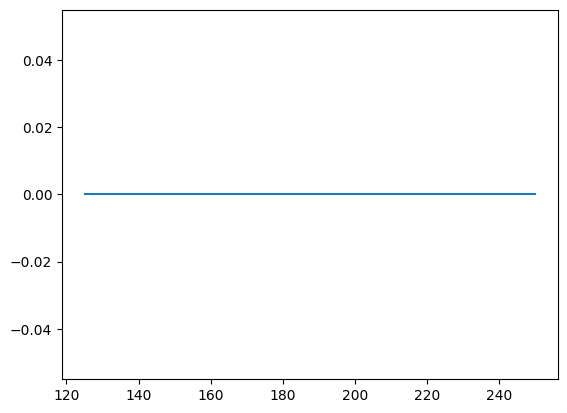

In [5]:
@njit
def Simp53(omega,A,OM,TC,test):
    
    a = 9*TC*OM;
    b = 7*TC;
    c = .2*OM;
    d = 0.3*TC/OM;
    e = .26*TC;
    f = .4*TC;
    g = .26*TC
    
    
    #print('a = ', a)
    #print('b = ', b)
    #print('c = ', c)
    #print('d = ', d)
    #print('e = ', e)
    #print('f = ', f)
    #print('g = ', g)

    
    Tmax = 250
    t = 0; dt = .001; ts = 1./6; click = 0; Saf = np.zeros((int(Tmax/ts)+1,3));


    p = 0; m =2; M = 1;
    nut = 0
    while t < Tmax:
        
        dnut = A/2*(1+np.sign(np.sin(2*np.pi/omega*t))) - 1*nut
        nut += dnut*dt
        k = 1/(1+nut)
        #k = 1+A*(np.sign(np.sin(np.sign(np.sin(2*np.pi/omega*t)))))
        dp = a - b*M*p/(p+k*c);
        dm = d*p**2 - e*m
        dM = f*m - g*M;
        
        t += dt
        p += dt*dp
        m += dt*dm
        M += dt*dM
        
        if (t > click*ts):
            Saf[click,0] = t
            Saf[click,1] = p
            Saf[click,2] = nut
            click += 1
    return Saf


/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mheltberg/miniconda3/envs/MathiasEnvironment1/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


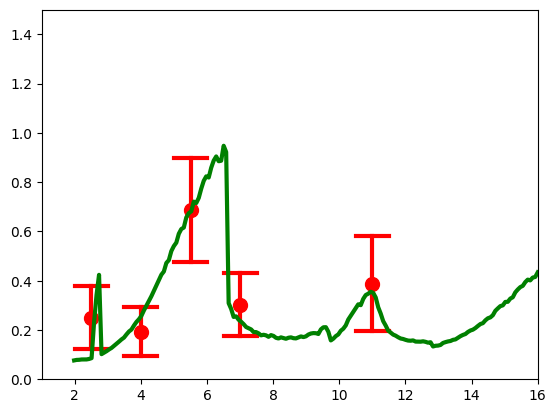

In [8]:
TC = 1.4
OM = 1
AA = 0.6
Amp = []
Amp2 = []
pt =-.1
Omegas = np.linspace(1,16,200)
for om in Omegas:
    Saf = Simp53(om,AA,OM,TC,0)
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.15,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    ampn1 = np.mean(Prop/2)
    Amp.append(ampn1);
    
    Saf = Simp53(om,AA,OM,TC,pt)
    x = Saf[int(len(Saf[:,1])/2):,1]
    t = Saf[int(len(Saf[:,1])/2):,0]
    x /= np.mean(x)
    peaks, properties = find_peaks(x, prominence=0.15,width=1) # Adjust the prominence value as needed
    Prop = properties["prominences"]
    
    ampn1 = np.mean(Prop/2)
   
    Amp2.append(ampn1);
    
    


T = np.array([2.5,4,5.5,7,11])
A = np.array([0.24967373,0.19343474 ,0.68748454, 0.30165857 ,0.38844195])
SA = np.array([0.12796711 ,0.09932851 ,0.21219281 ,0.12775849, 0.19276216])
Amp = np.array(Amp)
Amp2 = np.array(Amp2)
plt.plot(T,A,'or',markersize=10)
plt.plot([T,T],[A-SA,A+SA],'r',lw=3)
plt.plot([T-0.5,T+0.5],[A-SA,A-SA],'r',lw=3)
plt.plot([T-0.5,T+0.5],[A+SA,A+SA],'r',lw=3)
plt.plot(Omegas,Amp,'g',lw=3)
plt.axis([1,16,0,1.5])
#plt.plot(Omegas,Amp2,'b',lw=3)
plt.show()